In [67]:
#Using Sqlite3 to conncet SQL database
import sqlite3
import pandas as pd

def count(file, user_id):

    sql_connect = sqlite3.connect(file)
    sql_query = "select * from data where user_id == {}".format(user_id)
    df = pd.read_sql(sql_query, sql_connect )

    if df.empty:
        return 0
    else:
        sum_minutes = df.minutes.sum()
        return sum_minutes
    
count("users_data.sqlite", 8490)

294

In [71]:
import pandas as pd

def convert(file):
    df = pd.read_json(file)
    df_filter = df.iloc[0:1000]
    df_filter.to_hdf('user_study.h5',key='data')
    
convert("users_data.json")

In [ ]:
import requests
import pandas as pd

def issues(repo):
    url = "https://api.github.com/repos/{}/issues".format(repo)
    issues = requests.get(url)
    
    issues_list = []
    for issue in issues.json():
        issues_dict = {'number':issue['number'],
                    'title':issue['title'],
                    'user_name':issue['user']['login']}
        issues_list.append(issues_dict)
    
    issues_df = pd.DataFrame(issues_list)

    return issues_df

In [11]:
import requests
from lxml import html

def user_info(user_id):
    url = "https://www.shiyanlou.com/users/{}/".format(user_id)
    content = requests.get(url)
    if content.status_code != 200:
        user_name = None
        user_level = None
        join_date = None
    else:
        tree = html.fromstring(content.text)
        user_name = str(tree.xpath('normalize-space(//div[@class="user-meta"]/span[1]/text())'))
        user_level = int(str(tree.xpath('normalize-space(//div[@class="user-meta"]/span[2]/text())')).replace("L",""))
        join_date = str(tree.xpath('normalize-space(//span[@class="user-join-date"]/text())')).split(" ")[0]
    return user_name, user_level, join_date 

user_info("214893")  # 测试用例 1
user_info("1234567890")  # 测试用例 2

(None, None, None)

C:\Users\lampard1990\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lampard1990\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF73E90518>,
      dtype=object)

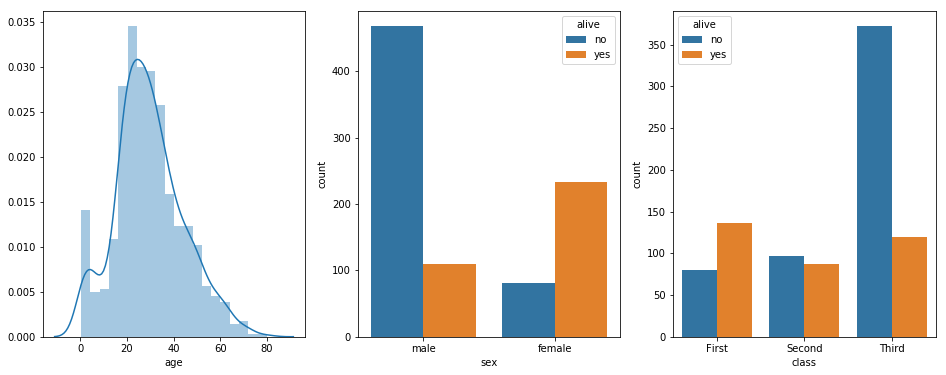

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot():
    df = sns.load_dataset("titanic")
    fig,axes = plt.subplots(1,3,figsize=(16,6))

    sns.distplot(df.dropna(subset=['age'])['age'], ax = axes[0])
    sns.countplot(x ="sex", data = df, hue="alive",  ax = axes[1])
    sns.countplot(x ="class", data = df, hue="alive",  ax = axes[2])
    return axes

plot()

In [52]:
import pandas as pd

def clean():
    df=pd.read_csv('earthquake.csv')
    df['region'] = df['place'].apply(lambda x:x.split(', ')[-1])
    df_sub = df[['time','latitude','longitude','depth','mag','region']]
    df_clean = df_sub.dropna().drop_duplicates()
    return df_clean

clean()



,time,latitude,longitude,depth,mag,region
0,2018-09-19T02:42:05.360Z,38.776501,-122.729332,1.47,0.72,CA
1,2018-09-19T02:31:38.744Z,66.385000,-157.328300,5.50,1.30,Alaska
2,2018-09-19T02:29:39.802Z,62.375800,-149.730800,0.00,1.60,Alaska
3,2018-09-19T02:23:47.301Z,60.438400,-143.057200,10.60,1.00,Alaska
4,2018-09-19T02:16:19.050Z,37.231800,-114.940500,7.90,0.70,Nevada
5,2018-09-19T02:08:05.660Z,33.652833,-116.734000,14.28,1.17,CA
6,2018-09-19T02:01:05.728Z,61.050500,-152.407600,109.70,1.70,Alaska
7,2018-09-19T01:49:54.186Z,61.991600,-150.609000,19.50,1.00,Alaska
8,2018-09-19T01:39:35.992Z,63.370700,-145.196900,10.00,1.10,Alaska
9,2018-09-19T01:24:12.992Z,61.717100,-146.641600,14.20,2.80,Alaska


In [96]:
import pandas as pd

def clean():
    df=pd.read_csv('earthquake.csv')
    df['region'] = df['place'].apply(lambda x:x.split(', ')[-1])
    df_sub = df[['time','latitude','longitude','depth','mag','region']]
    df_clean = df_sub.dropna().drop_duplicates()
    return df_clean

def mag_region():
    df_clean = clean()
    df_clean['mag'] = pd.cut(df_clean.mag, bins=[0, 2, 5, 7 ,9, float('inf')],right=False, labels =['micor','light','strong','major','great'])
    df_final = df_clean.groupby(by =[ 'mag','region']).count().dropna().reset_index()[['mag','region','time']].sort_values(by='time', ascending=False).drop_duplicates(['mag']).set_index('mag')
    df_final = df_final.rename(columns={"time": "times"})
    df_final['times'] = df_final['times'].astype('int')
    return df_final
df_final =  mag_region()
df_final

,region,times
mag,,
micor,CA,3374
light,Alaska,1222
strong,Indonesia,23
major,Fiji,2


In [114]:
import pandas as pd

def co2():

    df_climate = pd.read_excel('ClimateChange.xlsx',sheetname = 'Data')
    df_climate_sub = df_climate.loc[df_climate['Series code'] == 'EN.ATM.CO2E.KT',:].drop(labels=['Country name','Series code','Series name','SCALE','Decimals'],axis=1).set_index('Country code').replace({'..': pd.np.NaN})

    df_climate_sub = df_climate_sub.fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
    df_climate_sub.dropna(how='all',inplace=True)
    
    df_climate_sub['Sum emissions'] = df_climate_sub.sum(axis=1)
    df_climate_total = df_climate_sub['Sum emissions'].to_frame()

    df_country = pd.read_excel('ClimateChange.xlsx',sheetname = 'Country')
    df_country.set_index('Country code', inplace=True)
    df_country.drop(labels=['Capital city','Region','Lending category'], axis =1, inplace=True)

    df_merge = pd.concat([df_climate_total,df_country],axis=1).dropna(how='any',axis=0)

    df_sum = df_merge.groupby('Income group').sum()

    df_max = df_merge.sort_values(by='Sum emissions', ascending=False).groupby('Income group').head(1)
    df_max_sum = df_max.rename(columns={"Sum emissions": "Highest emissions","Country name": "Highest emission country"}).set_index('Income group')    
    
    
    df_min = df_merge.sort_values(by='Sum emissions').groupby('Income group').head(1)
    df_min_sum = df_min.rename(columns={"Sum emissions": "Lowest emissions","Country name": "Lowest emission country"}).set_index('Income group')
    
    results = pd.concat([df_sum, df_max_sum, df_min_sum], axis=1)
    results.reindex(columns=['Sum emissions','Highest emission country','Highest emissions','Lowest emission country', 'Lowest emissions'])
    return results

results = co2()

results


C:\Users\lampard1990\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
C:\Users\lampard1990\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

C:\Users\lampard1990\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,Sum emissions,Highest emissions,Highest emission country,Lowest emissions,Lowest emission country
High income: OECD,2.588373e+08,1.179918e+08,United States,46944.934,Iceland
High income: nonOECD,1.581112e+07,7.009760e+06,Saudi Arabia,1503.470,Turks and Caicos Islands
Low income,5.485641e+06,3.104479e+06,"Korea, Dem. Rep.",2068.188,Comoros
Lower middle income,6.272726e+07,2.681828e+07,India,601.388,Kiribati
Upper middle income,2.100775e+08,9.809777e+07,China,80.674,Niue
